<a href="https://colab.research.google.com/github/KevinCris2021/KevinCris2021/blob/main/Clase_3_DPTO_Ventas_Data_Science_aplicado_a_Negocios_%7C_6_Casos_de_Estudio_Reales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Departamento de Ventas (series temporales)**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/1. Base de Datos Python /Data Science aplicado a Negocios  6 Casos de Estudio Reales/3. Sales Department Data/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/1. Base de Datos Python /Data Science aplicado a Negocios  6 Casos de Estudio Reales/3. Sales Department Data/store.csv')

In [ ]:
df_1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df_1.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
df_1.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Explorar el dataset de ventas

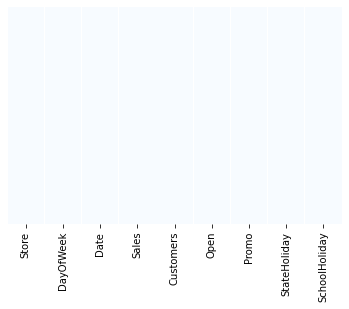

In [ ]:
#Veamos si nos faltan datos

sns.heatmap(df.isnull(), yticklabels= False, cbar= False,cmap= 'Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37e7807bd0>,
      dtype=object)

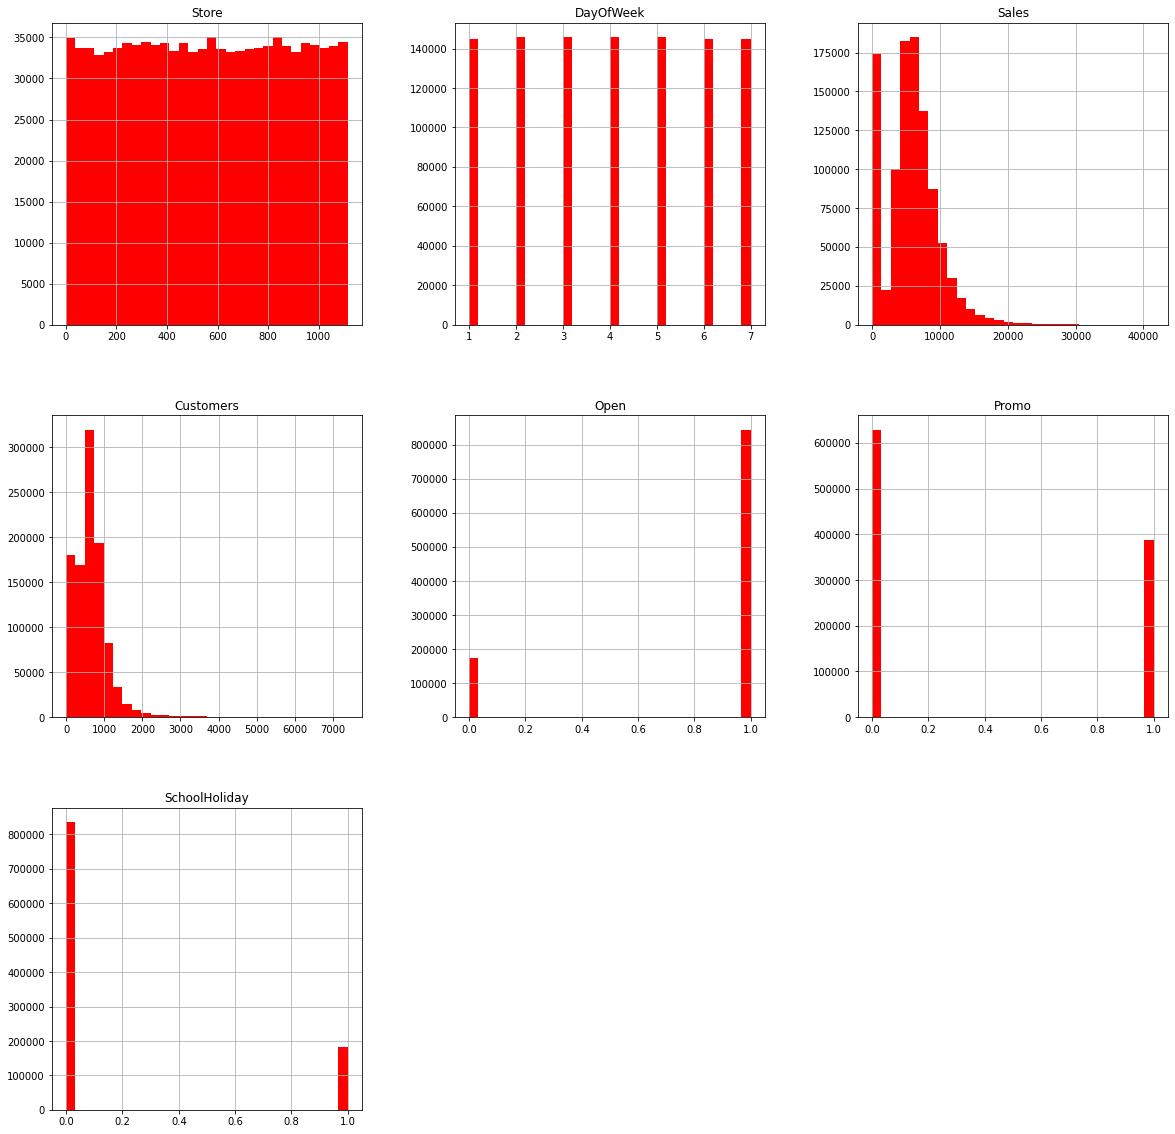

In [ ]:
df.hist(bins =30, figsize=(20,20), color='r')

In [ ]:
df['Customers'].max()

7388

In [ ]:
#Veamos cuántas tiendas están abiertas y cerradas:

df_open = df[df['Open'] == 1]
df_open

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [ ]:
df_close = df[df['Open'] ==0]
df_close

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
print('Total = {}'.format(len(df)))
print('Total de tiendas abiertas {}'.format(len(df_open)))
print('Total de tiendas cerradas {}'.format(len(df_close)))
print('Porcentaje de tiendas cerradas = {}'.format(100.0*len(df_close)/len(df)))

Total = 1017209
Total de tiendas abiertas 844392
Total de tiendas cerradas 172817
Porcentaje de tiendas cerradas = 16.98933060954042


In [ ]:
#Nos quedamos solo con las tiendas abiertas y elinamos las tiendas cerradas

df= df[df['Open'] == 1]

df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [ ]:
#Eliminamos la columna open ya que ahora no tiene sentido

df.drop(['Open'],axis=1, inplace=True) #1 es la fila

In [ ]:
df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [ ]:
df.describe()

#Ventas promedio = 6955 Euros, número promedio de clientes 762 (ha subido)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


Explorar los datos de la información de las tiendas

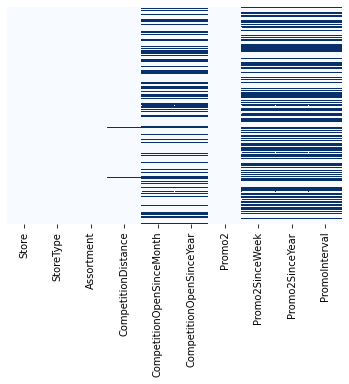

In [ ]:
sns.heatmap(df_1.isnull(), yticklabels=False, cbar= False, cmap='Blues')

In [ ]:
df_1[df_1['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
df_1[df_1['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
df_1[df_1['Promo2']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
#Parece que si 'promo2' es cero, 'Promo2SinceWeek','Promo2SinceYear',y la información de 'PromoInterval' se establece en cero
#Hay 354 filas 'CompetitionOpenSinceYear' y 'CompetitionOpenSinceMonth' falta
#Establezcamos estos valores en cero

str_cols = ['Promo2SinceWeek','Promo2SinceYear','PromoInterval','CompetitionOpenSinceYear','CompetitionOpenSinceMonth']

for str in str_cols:
  df_1[str].fillna(0,inplace = True)

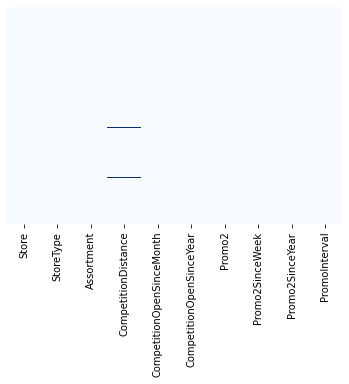

In [ ]:
sns.heatmap(df_1.isnull(),yticklabels=False, cbar=False, cmap= 'Blues')

In [ ]:
#Hay 3 filas con valores 'CompetitionDistance' que faltan, llenémoslas con valores promedio


df_1['CompetitionDistance'].fillna(df_1['CompetitionDistance'].mean(), inplace= True)


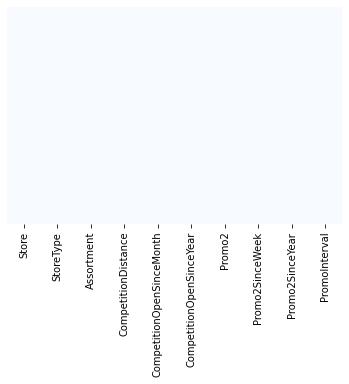

In [ ]:
sns.heatmap(df_1.isnull(),yticklabels=False, cbar=False, cmap= 'Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37e5e896d0>,
      dtype=object)

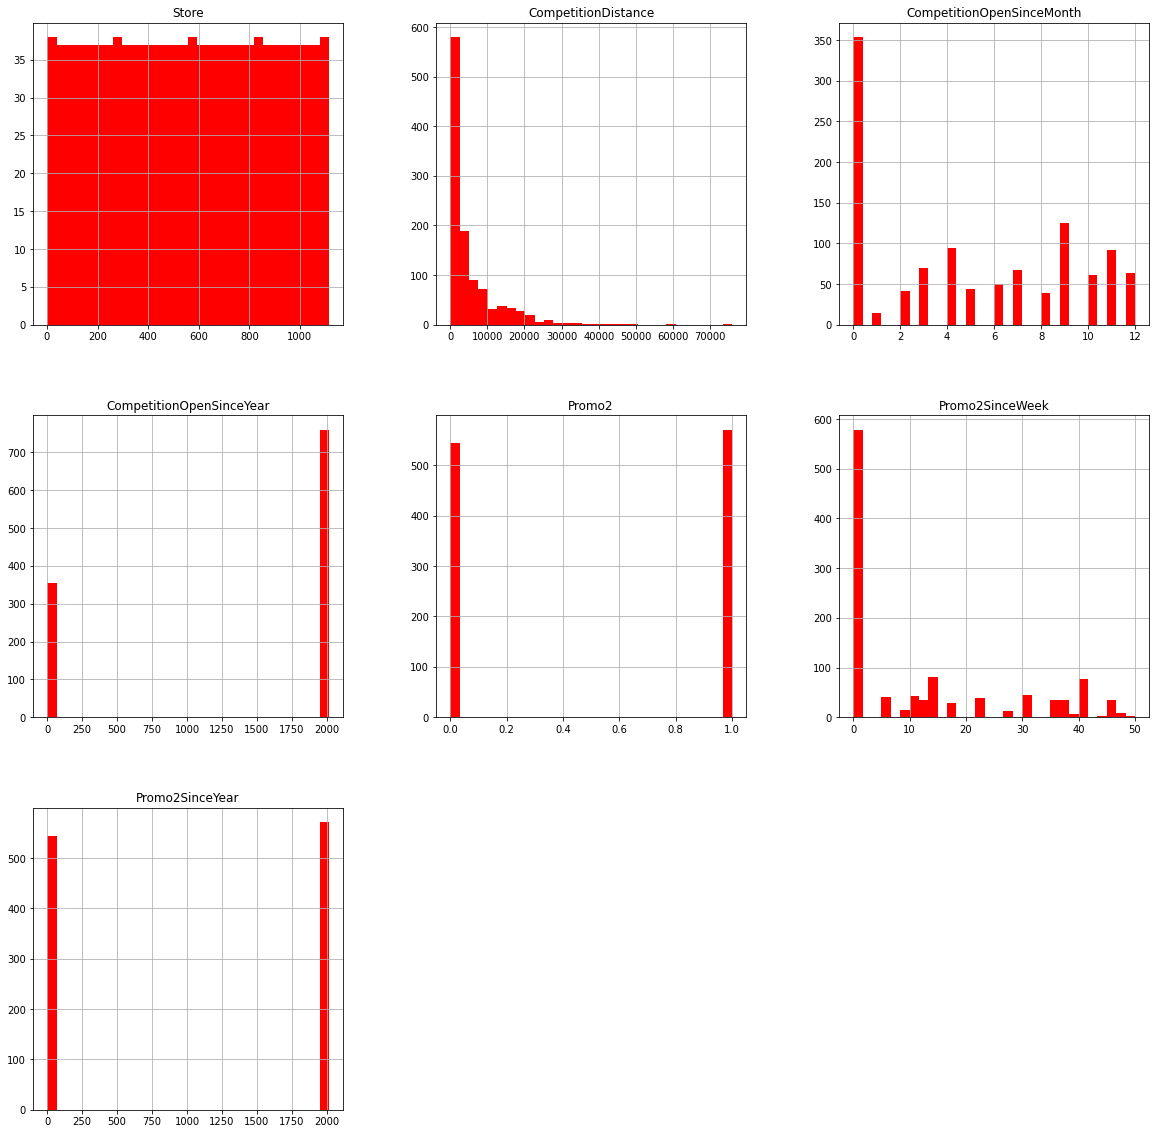

In [ ]:
df_1.hist(bins= 30, figsize=(20,20),color='r')

Exploración de dataset Combinado

In [ ]:
sales_train_all_df = pd.merge(df,df_1, how = 'inner',on = 'Store') # para indicar la info que hay en uno y otro (intersección)

In [ ]:
sales_train_all_df.to_csv('/content/drive/MyDrive/1. Base de Datos Python /Data Science aplicado a Negocios  6 Casos de Estudio Reales/3. Sales Department Data.csv', index = False)

In [ ]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [ ]:
correlation = sales_train_all_df.corr()['Sales'].sort_values()
correlation

#Los clientes y la promoción se correlacionana positivamente 
#Promo2 se parece ser efectivo en absoluto

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

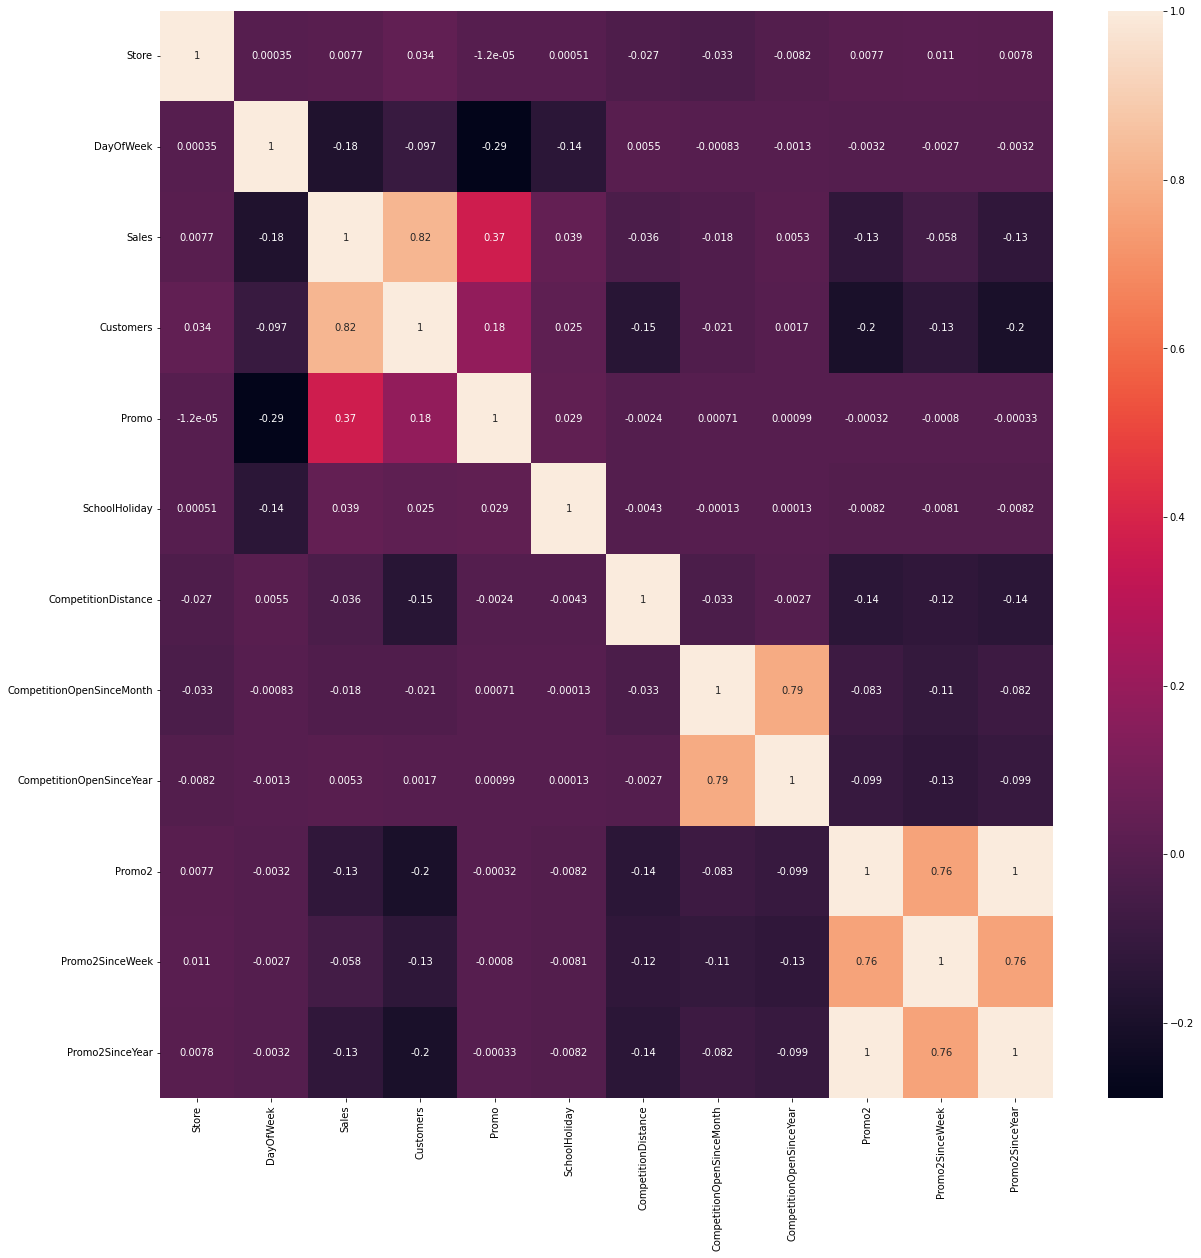

In [ ]:
correlation = sales_train_all_df.corr()

f,ax = plt.subplots (figsize=(20,20))
sns.heatmap(correlation,annot=True)


In [ ]:
#Separemos el año y pongamoslo en una columna separada

sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [ ]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013


In [ ]:
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [ ]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,7
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,5
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,4
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,3


Text(0.5, 1.0, 'Ventas por medio por Mes')

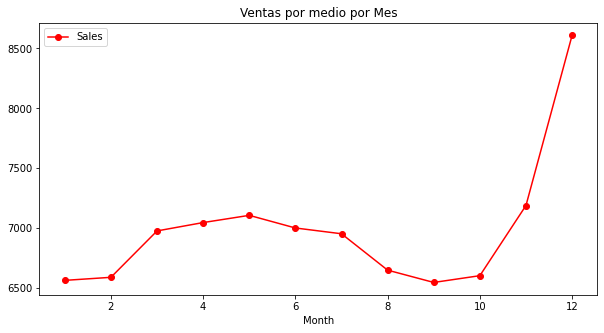

In [ ]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize=(10,5), marker = 'o', color = 'r')
axis.set_title('Ventas por medio por Mes')


Text(0.5, 1.0, 'Clientes promedio por Día')

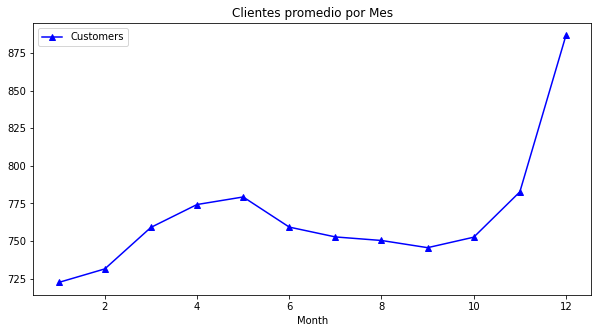

<Figure size 432x288 with 0 Axes>

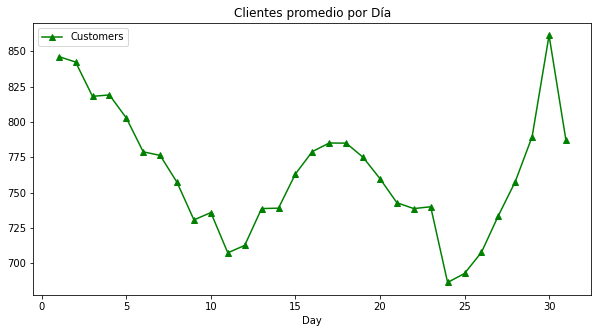

In [ ]:
axis1 = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize= (10,5),marker = '^',color = 'b')
axis1.set_title('Clientes promedio por Mes')


plt.figure()
axis1 = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize= (10,5),marker = '^',color = 'g')
axis1.set_title('Clientes promedio por Día')


Text(0.5, 1.0, 'Clientes promedio por Día')

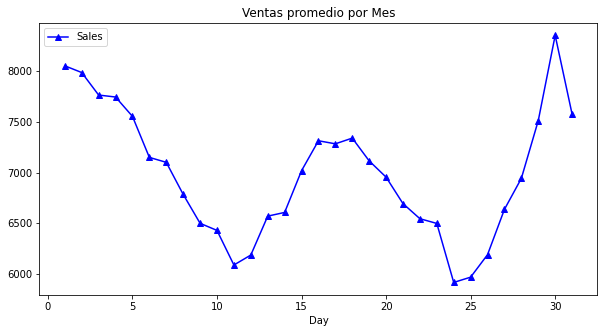

<Figure size 432x288 with 0 Axes>

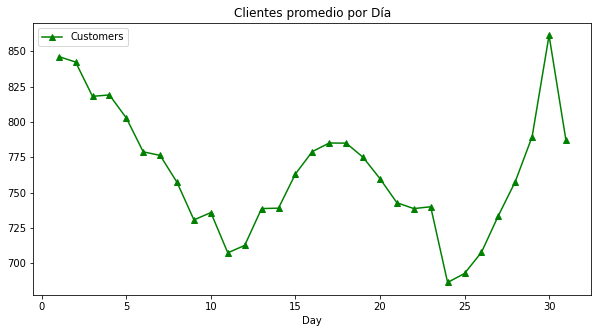

In [ ]:
axis1 = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize= (10,5),marker = '^',color = 'b')
axis1.set_title('Ventas promedio por Mes')


plt.figure()
axis1 = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize= (10,5),marker = '^',color = 'g')
axis1.set_title('Clientes promedio por Día')

Text(0.5, 1.0, 'Clientes promedio por día de Semana')

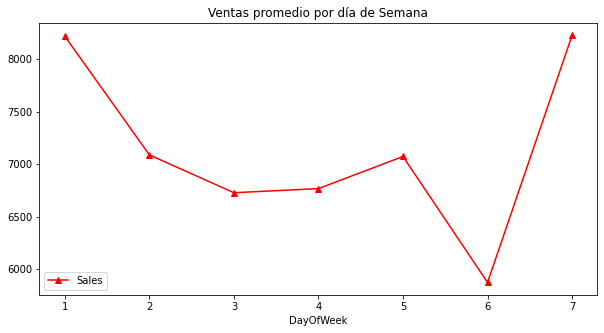

<Figure size 432x288 with 0 Axes>

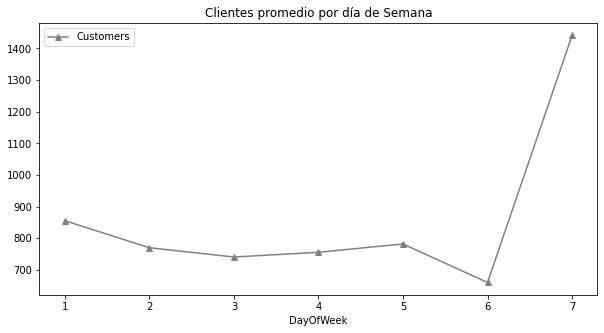

In [ ]:
axis= sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize =(10,5),marker = '^',color= 'r')
axis.set_title('Ventas promedio por día de Semana')

plt.figure()

axis= sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize =(10,5),marker = '^',color= 'gray')
axis.set_title('Clientes promedio por día de Semana')


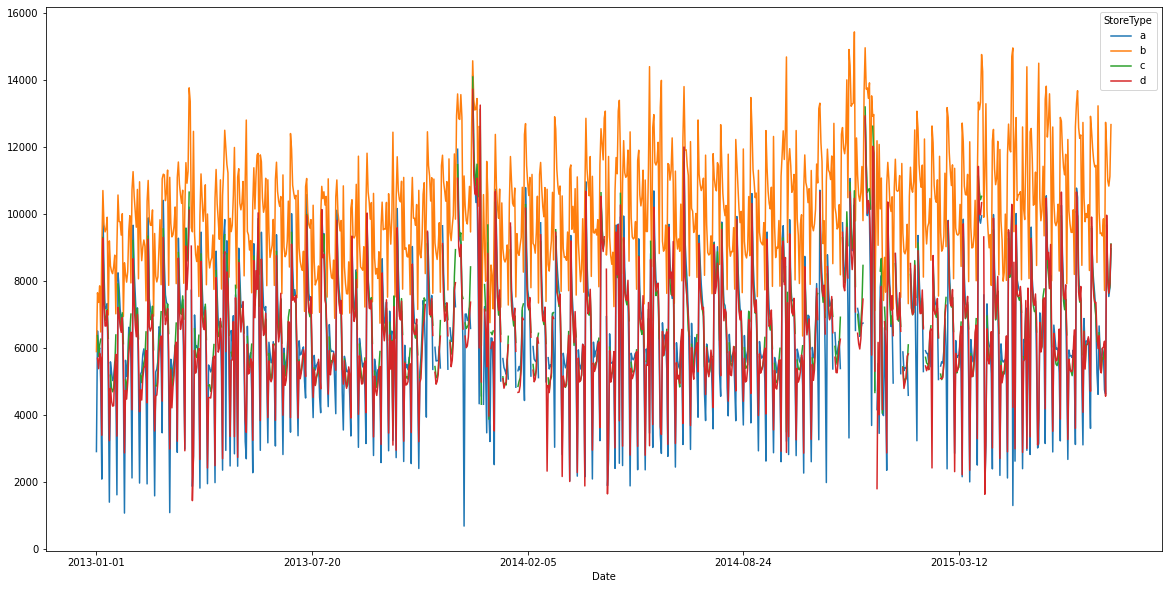

In [ ]:
fig, ax = plt.subplots (figsize=(20,10))

sales_train_all_df.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax)

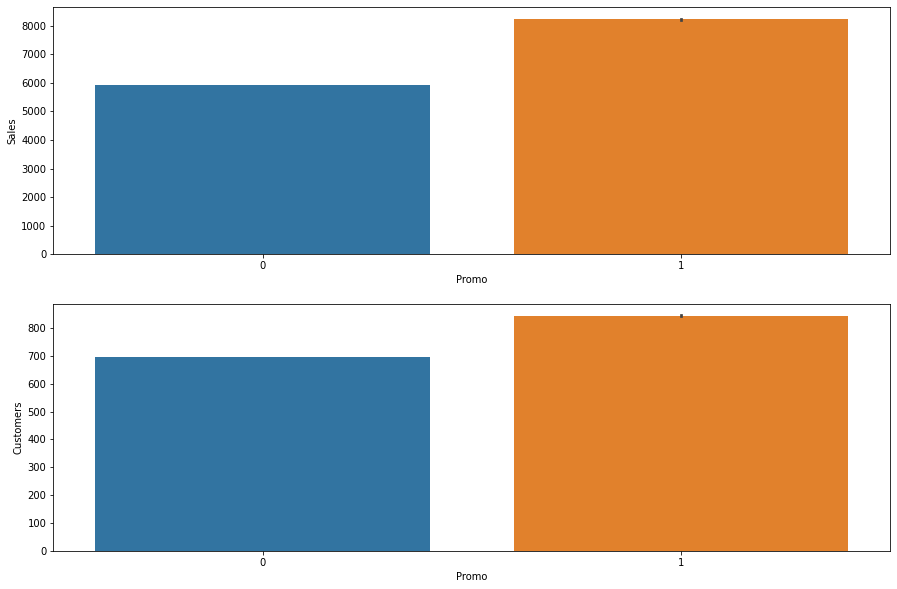

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.barplot(x= 'Promo',y= 'Sales',data = sales_train_all_df)

plt.subplot(212)
sns.barplot(x='Promo',y = 'Customers', data = sales_train_all_df)

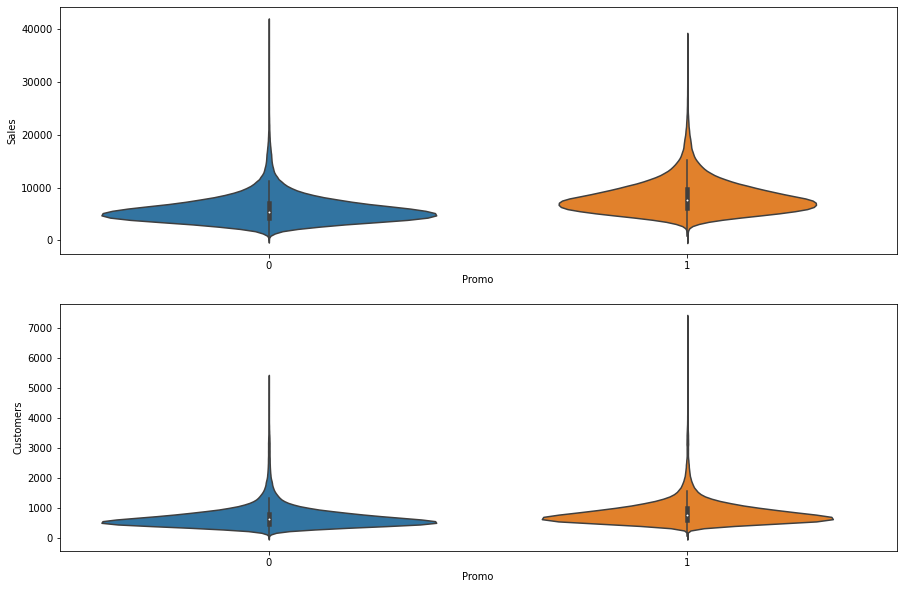

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.violinplot(x= 'Promo',y= 'Sales',data = sales_train_all_df)

plt.subplot(212)
sns.violinplot(x='Promo',y = 'Customers', data = sales_train_all_df)

**Entrenar el modelo**

In [ ]:
#import prophet

!pip install fbprophet
from fbprophet import Prophet

In [ ]:
def sales_predictions(Store_ID, sales_df, periods):
  sales_df = sales_df[sales_df['Store']== Store_ID]
  sales_df = sales_df[['Date','Sales']].rename(columns = {'Date':'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')

  model = Prophet()
  model.fit(sales_df) #ajuste del modelo

  future  = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel = 'Fecha',ylabel = 'Ventas')

  figure2 = model.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


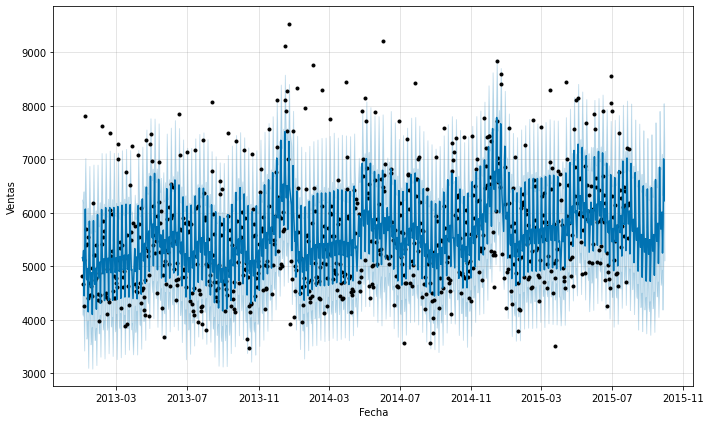

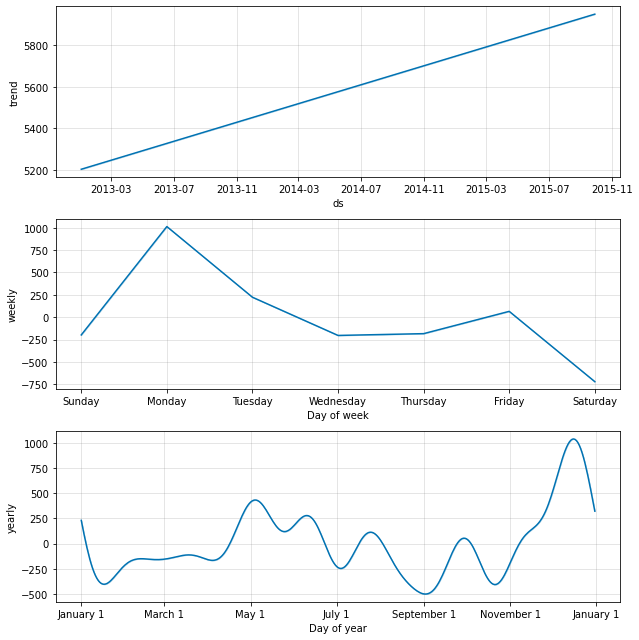

In [ ]:
df = sales_predictions(10, sales_train_all_df, 60)


#puntos negros son los datos históricos y es lo que FBprhphet ha usado
# los colores azules son los intervalos de confianza

# **Entrenar al modelo parte B**

* StateHoliday: Indica si el día era festivo o no (a  = vacaciones públicas, b = vacaciones Pascua Holiday, c= Navidades, 0 = No era festivo)
* SchoolHoliday: Indica si (Store, Date) se ve afectado por el cierre de las escuelas públicas

In [ ]:
def sales_predictions(Store_ID, sales_df,holidays,periods):
  sales_df = sales_df[sales_df['Store']== Store_ID]
  sales_df = sales_df[['Date','Sales']].rename(columns = {'Date':'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')

  model = Prophet(holidays= holidays)
  model.fit(sales_df) #ajuste del modelo

  future  = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel = 'Fecha',ylabel = 'Ventas')

  figure2 = model.plot_components(forecast)

In [ ]:
#Obtener todas las fechas relacionadas con las vacaciones escolares

school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday']== 1].loc[:, 'Date'].values 
school_holidays=np.unique(school_holidays)

In [ ]:
school_holidays.shape

(477,)

In [ ]:
#Obtener todas las fechas correspondientes a los festivos estatales

state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday']== 'a')| (sales_train_all_df['StateHoliday']== 'b')| (sales_train_all_df['StateHoliday']== 'c')].loc[:, 'Date'].values 
state_holidays

In [ ]:
state_holidays = np.unique(state_holidays)
state_holidays.shape

(35,)

In [ ]:
school_holidays = pd.DataFrame({'ds':pd.to_datetime(school_holidays), 'holiday': 'school_holiday'})

In [ ]:
school_holidays

,ds,holiday
0,2013-01-01,school_holiday
1,2013-01-02,school_holiday
2,2013-01-03,school_holiday
3,2013-01-04,school_holiday
4,2013-01-05,school_holiday
...,...,...
472,2015-07-27,school_holiday
473,2015-07-28,school_holiday
474,2015-07-29,school_holiday
475,2015-07-30,school_holiday


In [ ]:
state_holidays = pd.DataFrame({'ds':pd.to_datetime(state_holidays), 'holiday': 'state_holiday'})

In [ ]:
state_holidays

In [ ]:
#Concatenamos las vacaciones escolares y los festvos estatales

school_state_holidays = pd.concat((state_holidays,school_holidays), axis=0)

In [ ]:
school_state_holidays

,ds,holiday
0,2013-01-01,state_holiday
1,2013-01-06,state_holiday
2,2013-03-29,state_holiday
3,2013-04-01,state_holiday
4,2013-05-01,state_holiday
...,...,...
472,2015-07-27,school_holiday
473,2015-07-28,school_holiday
474,2015-07-29,school_holiday
475,2015-07-30,school_holiday


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


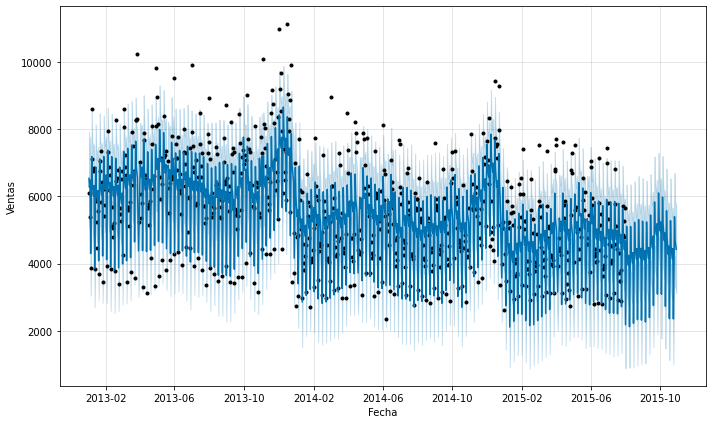

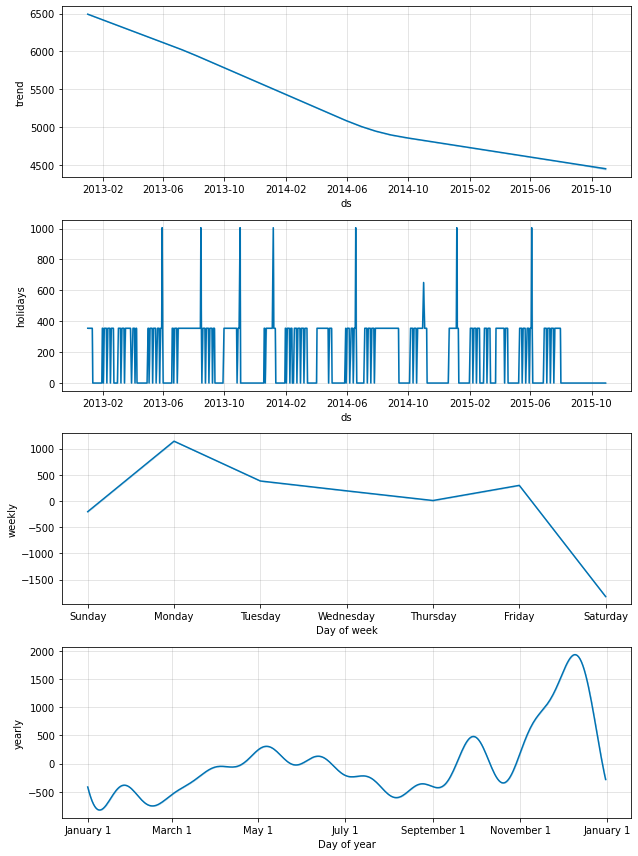

In [ ]:
#Hagamos predicciones 

sales_predictions(6,sales_train_all_df,school_state_holidays, 90)